In [243]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# GAME AWARDS DATA

In [279]:
#DATASET CON NOMINADOS ENTRE 2014 Y 2019

ga_1419 = pd.read_csv("C:/Users/luisf/Desktop/IRONHACK/PROYECTOS/Proyectos/VIDEOJUEGOS/Recursos/game_awards_2014_2019.csv")
ga_1419.head()

,year,category,nominee,company,winner,voted
0,2014,Game of the Year,Dragon Age: Inquisition,BioWare,1,jury
1,2014,Game of the Year,Bayonetta 2,Platinum Games,0,jury
2,2014,Game of the Year,Dark Souls II,FromSoftware,0,jury
3,2014,Game of the Year,Hearthstone: Heroes of Warcraft,Blizzard Entertainment,0,jury
4,2014,Game of the Year,Middle-earth: Shadow of Mordor,Monolith Productions,0,jury


In [245]:
#DATASET CON NOMINADOS ENTRE 2020 Y 2023

ga_2023 = pd.read_excel("C:/Users/luisf/Desktop/IRONHACK/PROYECTOS/Proyectos/VIDEOJUEGOS/Recursos/game_awards_2020_2023.xlsx")
ga_2023.head()

,Year,Category,Game,Studio,Winner
0,2023,Game of the Year,Alan Wake 2,Remedy Entertainment/Epic Games Publishing,0
1,2023,Game of the Year,Baldur’s Gate 3,Larian Studios,1
2,2023,Game of the Year,Marvel’s Spider-Man 2,Insomniac Games/SIE,0
3,2023,Game of the Year,Resident Evil 4,Capcom,0
4,2023,Game of the Year,Super Mario Bros. Wonder,Nintendo,0


## Limpieza

Corregimos errores de nombres de columnas y eliminamos alguna que es innecesaria en cada uno de los dataframes.

In [246]:
ga_1419.rename(columns= {'nominee' : 'game'}, inplace= True)
ga_1419.drop('voted', axis= 1, inplace= True)
ga_1419.head()

,year,category,game,company,winner
0,2014,Game of the Year,Dragon Age: Inquisition,BioWare,1
1,2014,Game of the Year,Bayonetta 2,Platinum Games,0
2,2014,Game of the Year,Dark Souls II,FromSoftware,0
3,2014,Game of the Year,Hearthstone: Heroes of Warcraft,Blizzard Entertainment,0
4,2014,Game of the Year,Middle-earth: Shadow of Mordor,Monolith Productions,0


In [247]:
ga_2023.columns = ga_2023.columns.str.lower()
ga_2023.rename(columns= {'studio' : 'company'}, inplace= True)
ga_2023.head()

,year,category,game,company,winner
0,2023,Game of the Year,Alan Wake 2,Remedy Entertainment/Epic Games Publishing,0
1,2023,Game of the Year,Baldur’s Gate 3,Larian Studios,1
2,2023,Game of the Year,Marvel’s Spider-Man 2,Insomniac Games/SIE,0
3,2023,Game of the Year,Resident Evil 4,Capcom,0
4,2023,Game of the Year,Super Mario Bros. Wonder,Nintendo,0


Unimos los 2 dataframes con un concat(vertical) ya que la fechas no se solapan y sus columnas contienen el mismo tipo de información.

In [248]:
game_awards = pd.concat([ga_1419, ga_2023], axis= 0).reset_index(drop= True)
game_awards

,year,category,game,company,winner
0,2014,Game of the Year,Dragon Age: Inquisition,BioWare,1
1,2014,Game of the Year,Bayonetta 2,Platinum Games,0
2,2014,Game of the Year,Dark Souls II,FromSoftware,0
3,2014,Game of the Year,Hearthstone: Heroes of Warcraft,Blizzard Entertainment,0
4,2014,Game of the Year,Middle-earth: Shadow of Mordor,Monolith Productions,0
...,...,...,...,...,...
1313,2020,Best eSports Game,League of Legends,Riot Games,1
1314,2020,Best eSports Game,Call of Duty: Modern Warfare,Infinity Ward / Raven Software / Activision,0
1315,2020,Best eSports Game,Counter-Strike: Global Offensive,Valve,0
1316,2020,Best eSports Game,Fortnite,Epic Games,0


Filtramos el dataframe anterior para solo obtener los nominados a la competición que nos interesa ("Game of the Year"). Utilizamos una condición para igualar a la competicion el valor y despues ordenamos la tabla por fecha.

In [249]:
condicion = game_awards['category'] == 'Game of the Year'
df_goty = game_awards[condicion]
df_goty.sort_values(by= 'year', inplace= True)
df_goty = df_goty.reset_index(drop= True)
df_goty.head()

C:\Users\luisf\AppData\Local\Temp\ipykernel_12152\931203563.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_goty.sort_values(by= 'year', inplace= True)


,year,category,game,company,winner
0,2014,Game of the Year,Dragon Age: Inquisition,BioWare,1
1,2014,Game of the Year,Bayonetta 2,Platinum Games,0
2,2014,Game of the Year,Dark Souls II,FromSoftware,0
3,2014,Game of the Year,Hearthstone: Heroes of Warcraft,Blizzard Entertainment,0
4,2014,Game of the Year,Middle-earth: Shadow of Mordor,Monolith Productions,0


Eliminamos los signos innecesarios de la columna 'company' para que no haya comlicaciones a la hora de comparar datos.

In [250]:
df_goty['company'] = df_goty['company'].str.replace('/', ' ') 
df_goty.head()

,year,category,game,company,winner
0,2014,Game of the Year,Dragon Age: Inquisition,BioWare,1
1,2014,Game of the Year,Bayonetta 2,Platinum Games,0
2,2014,Game of the Year,Dark Souls II,FromSoftware,0
3,2014,Game of the Year,Hearthstone: Heroes of Warcraft,Blizzard Entertainment,0
4,2014,Game of the Year,Middle-earth: Shadow of Mordor,Monolith Productions,0


# RATING AND GENRE DATA

In [251]:
#DATAFRAME CON INFO DE JUEGOS Y NOTAS DE USUSARIOS

user_ratings = pd.read_csv("C:/Users/luisf/Desktop/IRONHACK/PROYECTOS/Proyectos/VIDEOJUEGOS/Recursos/user_ratings.csv")
user_ratings.head()

,Game Name,Genre,Platform,Release Year,User Rating
0,Sekiro: Shadows Die Twice,Sports,Nintendo Switch,2014,9.654719
1,Control,Puzzle,Nintendo Switch,2000,3.457386
2,Among Us,Strategy,Nintendo Switch,2007,5.367622
3,Call of Duty: Modern Warfare,Stealth,PlayStation,2005,1.240325
4,League of Legends,Simulation,PC,2021,3.535476


In [252]:
#DATAFRAME CON INFO DE JUEGOS Y NOTAS DE GENERALES

genres_ratings = pd.read_csv("C:/Users/luisf/Desktop/IRONHACK/PROYECTOS/Proyectos/VIDEOJUEGOS/Recursos/genres_ratings.csv")
genres_ratings.head()

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,0,Elden Ring,"Feb 25, 2022","['FromSoftware', 'Bandai Namco Entertainment']","Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K
1,1,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K,5.1K,3K
2,2,Hades,"Dec 07, 2018",['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25K,3.5K,7.3K,4K,3.2K,2.1K
3,3,Hollow Knight,"Feb 24, 2017",['Team Cherry'],A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25K,2.7K,9.6K,2.6K,3.4K,2.1K
4,4,Undertale,"Sep 15, 2015","['tobyfox', '8-4']","A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32K,728,5.7K,2.1K,3.9K,2.5K


## Limpieza

Comenzamos con la limpieza de los dos nuevos dataframes con los que apmliamos la informacion. Compañias, plataformas, valoración, año de lanzamiento, generos.

DATAFRAME USER-RATINGS

In [253]:
user_ratings.columns = user_ratings.columns.str.lower() #Convertimos nombres de columnas a minúsculas.
user_ratings.drop(['genre', 'platform'], axis= 1, inplace= True) #Eliminamos 2 columnas.
user_ratings['user rating'] = user_ratings['user rating'].round(2) #Redondeamos a 2 decimales la nota.
condicion = user_ratings['release year'] >= 2014 #Creamos una condición para quedarnos solo con juegos con fecha de lanzamiento superior a 2014.
user_ratings = user_ratings[condicion]
user_ratings.sort_values(by= 'release year', inplace= True) #Ordenamos por fecha.
user_ratings = user_ratings.reset_index(drop= True)
user_ratings.head()

,game name,release year,user rating
0,Monster Hunter: World,2014,8.61
1,God of War,2014,3.43
2,Assassin's Creed Valhalla,2014,2.44
3,Minecraft,2014,8.07
4,Watch Dogs: Legion,2014,7.80


En el anterior código nos hemos quedado solo con la fechas superiores a 2014 ya que el dataframe de premios empieza ese año, que es cuando empezo a realiziarse la gala.

DATAFRAME GENRES_RATINGS

In [254]:
genres_ratings = genres_ratings.drop(['Unnamed: 0', 'Summary', 'Plays', 'Playing', 'Backlogs', 'Wishlist', 'Lists', 'Reviews'], axis = 1) #Eliminamos todas las columnas que no van a ser necesarias.
genres_ratings.columns = genres_ratings.columns.str.lower() #Cambiamos el nombre de las columnas a minúsculas.
genres_ratings.rename(columns= {'release_date': 'year'}, inplace= True) #Cambiamos el nombre de la columna 'release_date' para unificar con el resto de columnas relacionadas a fechas.
genres_ratings = genres_ratings.dropna(subset=["year"]) #Eliminamos todas las filas que no tengan fecha de lanzamietno(valores nulos)
genres_ratings = genres_ratings.rename(columns={'title': 'game'})
genres_ratings.head()

,game,year,developers,platforms,genres,rating
0,Elden Ring,"Feb 25, 2022","['FromSoftware', 'Bandai Namco Entertainment']","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5
1,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...","['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4
2,Hades,"Dec 07, 2018",['Supergiant Games'],"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3
3,Hollow Knight,"Feb 24, 2017",['Team Cherry'],"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4
4,Undertale,"Sep 15, 2015","['tobyfox', '8-4']","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2


In [255]:
genres_ratings = genres_ratings.drop(genres_ratings[genres_ratings['year'] == 'TBD'].index) #Eliminamos los valores "TBD". Son juegos que tienen pendiente una fecha de lanzamiento en un futuro.
genres_ratings['year'].value_counts()

year
Dec 31, 2023    355
Dec 31, 1995    219
Dec 31, 1994    200
Dec 31, 1983    189
Dec 31, 1987    179
               ... 
Nov 16, 2013      1
May 06, 2019      1
Mar 01, 1982      1
Apr 21, 1986      1
Feb 17, 1984      1
Name: count, Length: 8955, dtype: int64

En este momento tenemos que cambiar el formato de la fecha, puesto que en este df no fiene escrito en texto y necesitamos solamente el año para unificar la información con el resto de df. 

En este caso utilizamos la función to_datetime, especificamos en que formato viene la fecha escrita actualmente y despues indicamos que solo necesitamos el año.

In [256]:
genres_ratings['year'] = pd.to_datetime(genres_ratings['year'], format='%b %d, %Y').dt.year
genres_ratings

,game,year,developers,platforms,genres,rating
0,Elden Ring,2022,"['FromSoftware', 'Bandai Namco Entertainment']","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5
1,The Legend of Zelda: Breath of the Wild,2017,"['Nintendo', 'Nintendo EPD Production Group No...","['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4
2,Hades,2018,['Supergiant Games'],"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3
3,Hollow Knight,2017,['Team Cherry'],"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4
4,Undertale,2015,"['tobyfox', '8-4']","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2
...,...,...,...,...,...,...
59995,Dragon Spirits,2023,"['FHNBHJ', 'indienova']",['Windows PC'],['RPG'],NaN
59996,Pathfinder: Kingmaker - Definitive Edition,2020,"['Owlcat Games', 'Deep Silver']","['PlayStation 4', 'Xbox One']","['RPG', 'Tactical']",3.7
59997,Sainth,2008,['Neo Kuriyo'],['Windows PC'],[],NaN
59998,Dragon Spirits,2023,"['FHNBHJ', 'indienova']",['Windows PC'],['RPG'],NaN


In [257]:
genres_ratings = genres_ratings[genres_ratings['year'] >= 2014] #Filtramos datos solo a partir de 2014
genres_ratings.isna().sum()

game              0
year              0
developers        0
platforms         0
genres            0
rating        16261
dtype: int64

In [258]:
genres_ratings[genres_ratings['rating'] >= 2.5] #'''NO DEJAR ESTO HECHO, ES UNA PRUEBA'''

,game,year,developers,platforms,genres,rating
0,Elden Ring,2022,"['FromSoftware', 'Bandai Namco Entertainment']","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5
1,The Legend of Zelda: Breath of the Wild,2017,"['Nintendo', 'Nintendo EPD Production Group No...","['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4
2,Hades,2018,['Supergiant Games'],"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3
3,Hollow Knight,2017,['Team Cherry'],"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4
4,Undertale,2015,"['tobyfox', '8-4']","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2
...,...,...,...,...,...,...
59962,Iron Harvest,2020,"['King Art Games', 'King Art']","['Windows PC', 'PlayStation 4', 'Xbox One']","['Real Time Strategy', 'Strategy']",2.8
59969,Relayer,2022,['Kadokawa Games'],"['PlayStation 4', 'PlayStation 5']","['RPG', 'Simulator', 'Strategy']",3.1
59972,Planet Crafter,2022,['Miju Games'],['Windows PC'],"['Adventure', 'Simulator']",3.8
59996,Pathfinder: Kingmaker - Definitive Edition,2020,"['Owlcat Games', 'Deep Silver']","['PlayStation 4', 'Xbox One']","['RPG', 'Tactical']",3.7


En este momento necesitamos utilizar las columnas de 'company' y 'genre', pero necesitamos hacerles una limpieza pues todos los caracteres especiales que hay en ellas nos pueden complicar el trabajo futuro.

In [259]:
genres_ratings['developers'] = genres_ratings['developers'].str.replace(r"[\[\]'\",()\-]", '', regex=True)
genres_ratings['platforms'] = genres_ratings['platforms'].str.replace(r"[\[\]'\",()\-]", '', regex=True)
genres_ratings['genres'] = genres_ratings['genres'].str.replace(r"[\[\]'\",()\-]", '', regex=True)

C:\Users\luisf\AppData\Local\Temp\ipykernel_12152\3776928518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres_ratings['developers'] = genres_ratings['developers'].str.replace(r"[\[\]'\",()\-]", '', regex=True)
C:\Users\luisf\AppData\Local\Temp\ipykernel_12152\3776928518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres_ratings['platforms'] = genres_ratings['platforms'].str.replace(r"[\[\]'\",()\-]", '', regex=True)
C:\Users\luisf\AppData\Local\Temp\ipykernel_12152\3776928518.py:3: Setting

Para hacer la limpieza anterior hemos utilizado una expresion regular (regex) para reemplazar por un espacio todos los caraceteres especias de las columnas seleccionadas:

In [260]:
genres_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27819 entries, 0 to 59999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   game        27819 non-null  object 
 1   year        27819 non-null  int32  
 2   developers  27819 non-null  object 
 3   platforms   27819 non-null  object 
 4   genres      27819 non-null  object 
 5   rating      11558 non-null  float64
dtypes: float64(1), int32(1), object(4)
memory usage: 1.4+ MB


In [261]:
genres_ratings['rating'].isna().sum()

np.int64(16261)

In [262]:
genres_ratings = genres_ratings.dropna(subset=['rating']) #Eliminamos los valores nulos de la columna rating

En el cuadro anterior hemos tenido que eliminar los valores nulos de esa columna pues eran demasiado como para

In [263]:
user_ratings

,game name,release year,user rating
0,Monster Hunter: World,2014,8.61
1,God of War,2014,3.43
2,Assassin's Creed Valhalla,2014,2.44
3,Minecraft,2014,8.07
4,Watch Dogs: Legion,2014,7.80
...,...,...,...
2040,Counter-Strike: Global Offensive,2023,1.11
2041,The Elder Scrolls V: Skyrim,2023,5.08
2042,Madden NFL 21,2023,1.99
2043,Counter-Strike: Global Offensive,2023,5.99


In [264]:
genres_ratings

,game,year,developers,platforms,genres,rating
0,Elden Ring,2022,FromSoftware Bandai Namco Entertainment,Windows PC PlayStation 4 Xbox One PlayStation ...,Adventure RPG,4.5
1,The Legend of Zelda: Breath of the Wild,2017,Nintendo Nintendo EPD Production Group No. 3,Wii U Nintendo Switch,Adventure Puzzle,4.4
2,Hades,2018,Supergiant Games,Windows PC Mac PlayStation 4 Xbox One PlayStat...,Adventure Brawler Indie RPG,4.3
3,Hollow Knight,2017,Team Cherry,Windows PC Mac Linux Nintendo Switch,Adventure Indie Platform,4.4
4,Undertale,2015,tobyfox 84,Windows PC Mac Linux PlayStation 4 Xbox One Pl...,Adventure Indie RPG Turn Based Strategy,4.2
...,...,...,...,...,...,...
59962,Iron Harvest,2020,King Art Games King Art,Windows PC PlayStation 4 Xbox One,Real Time Strategy Strategy,2.8
59969,Relayer,2022,Kadokawa Games,PlayStation 4 PlayStation 5,RPG Simulator Strategy,3.1
59972,Planet Crafter,2022,Miju Games,Windows PC,Adventure Simulator,3.8
59996,Pathfinder: Kingmaker - Definitive Edition,2020,Owlcat Games Deep Silver,PlayStation 4 Xbox One,RPG Tactical,3.7


Obserbando los 2 df he llegado la conlusión de que abandoaremos el fd 'user_ratings'. El otro es mucho mas completo y nos puede proporcionar una analisis mas fiable. Unir los dos e un único df no considero que sea buena idea pues tienen una gran diferencia de tamaño y lo único que conseguiriamos es generar valores nulos.

# TIPOS DE JUEGOS

Ahora necesito generar una nueva columna con una nueva información a los 2 df retantes. En este caso es el "tipo de juego".

EL tipo de juego se calsifica en Indie, AA, AAA y suele ir ligado a el presupuesto empleado para el desarrollo del mismo. En este caso podemos sacar esa información buscando los compañias mas importantes y grandes de la industria de los videojuegos y utilizarlo en nuestro favor para generar esos datos.

In [265]:
types = []

big_companies = [
    "Tencent", "Sony", "Microsoft", "Xbox", "Nintendo", "Activision",
    "Electronic Arts", "EA", "Take-Two Interactive", "Ubisoft",
    "Bandai Namco Entertainment", "Epic Games", "Rockstar", "Naughty Dog",
    "FromSoftware", "CD Projekt Red", "Insomniac Games", "Santa Monica Studio",
    "Guerrilla Games", "Bethesda", "Square Enix", "Capcom", "Valve",
    "Remedy Entertainment", "Supercell", "Riot Games"
]

for index, row in genres_ratings.iterrows():
    company_value = str(row['developers']).lower()
    genres = str(row['genres'])

    if 'indie' in genres.lower():
        types.append('Indie')
    elif any(name.lower() in company_value for name in big_companies):
        types.append('AAA')
    else:
        types.append('AA')

genres_ratings['type'] = types

Después de investigar un poco he podido sacar las empresas y meterlas en una lista llamada "big_companies".

Este código recorre cada fila del df y clasifica los juegos según su desarrollador y género: si el género coincide con la palabra "indie", se marca como Indie, si el desarrollador es una gran compañía (de la lista big_companies), se marca como AAA y si no cumple ninguna de las dos condiciones, se marca como AA.


In [266]:
genres_ratings.head()

,game,year,developers,platforms,genres,rating,type
0,Elden Ring,2022,FromSoftware Bandai Namco Entertainment,Windows PC PlayStation 4 Xbox One PlayStation ...,Adventure RPG,4.5,AAA
1,The Legend of Zelda: Breath of the Wild,2017,Nintendo Nintendo EPD Production Group No. 3,Wii U Nintendo Switch,Adventure Puzzle,4.4,AAA
2,Hades,2018,Supergiant Games,Windows PC Mac PlayStation 4 Xbox One PlayStat...,Adventure Brawler Indie RPG,4.3,Indie
3,Hollow Knight,2017,Team Cherry,Windows PC Mac Linux Nintendo Switch,Adventure Indie Platform,4.4,Indie
4,Undertale,2015,tobyfox 84,Windows PC Mac Linux PlayStation 4 Xbox One Pl...,Adventure Indie RPG Turn Based Strategy,4.2,Indie


Pasamos a unir los dos df restantes con un merge (left) porque lo que queremos en este caso es añadir información al df de los premiados/nominados y no que se pase la información de todos los juegos que no han participado.

In [267]:
df_merged = pd.merge(df_goty, genres_ratings, on=['game', 'year'], how='left')

In [268]:
df_merged.head()

,year,category,game,company,winner,developers,platforms,genres,rating,type
0,2014,Game of the Year,Dragon Age: Inquisition,BioWare,1,Electronic Arts BioWare Edmonton,Windows PC Xbox 360 PlayStation 4 PlayStation ...,Adventure RPG Tactical,3.4,AAA
1,2014,Game of the Year,Bayonetta 2,Platinum Games,0,PlatinumGames Nintendo,Wii U Nintendo Switch,Brawler,4.1,AAA
2,2014,Game of the Year,Dark Souls II,FromSoftware,0,FromSoftware Bandai Namco Entertainment,Windows PC Xbox 360 PlayStation 3,Adventure RPG,3.4,AAA
3,2014,Game of the Year,Hearthstone: Heroes of Warcraft,Blizzard Entertainment,0,NaN,NaN,NaN,NaN,NaN
4,2014,Game of the Year,Middle-earth: Shadow of Mordor,Monolith Productions,0,Monolith Productions WB Games,Windows PC Mac Xbox 360 Linux PlayStation 4 Pl...,Adventure Brawler RPG,3.4,AA


El merge revela que hay juegos que no estaban dentro del df genres_ratings y no ha creado celdas con valores nulos.

En este caso como lo que nos importa es saber que juegos son de que tipo, volveremos a hacer un bucle. No aprovecharemos de que en el df de nominados ya existia una columna con las compañias(sin valores nulos) y la utilizaremos para hacer el mismo procedimiento de antes.

In [269]:
types = []

big_companies = [
    "Tencent", "Sony", "Microsoft", "Xbox", "Nintendo", "Activision",
    "Electronic Arts", "EA", "Take-Two Interactive", "Ubisoft",
    "Bandai Namco Entertainment", "Epic Games", "Rockstar", "Naughty Dog",
    "FromSoftware", "CD Projekt Red", "Insomniac Games", "Santa Monica Studio",
    "Guerrilla Games", "Bethesda", "Square Enix", "Capcom", "Valve",
    "Remedy Entertainment", "Supercell", "Riot Games"
]

for index, row in df_merged.iterrows():
    company_value = str(row['company']).lower()
    genres = str(row['genres'])

    if 'indie' in genres.lower():
        types.append('Indie')
    elif any(name.lower() in company_value for name in big_companies):
        types.append('AAA')
    else:
        types.append('AA')

df_merged['type'] = types

In [270]:
df_merged

,year,category,game,company,winner,developers,platforms,genres,rating,type
0,2014,Game of the Year,Dragon Age: Inquisition,BioWare,1,Electronic Arts BioWare Edmonton,Windows PC Xbox 360 PlayStation 4 PlayStation ...,Adventure RPG Tactical,3.4,AA
1,2014,Game of the Year,Bayonetta 2,Platinum Games,0,PlatinumGames Nintendo,Wii U Nintendo Switch,Brawler,4.1,AA
2,2014,Game of the Year,Dark Souls II,FromSoftware,0,FromSoftware Bandai Namco Entertainment,Windows PC Xbox 360 PlayStation 3,Adventure RPG,3.4,AAA
3,2014,Game of the Year,Hearthstone: Heroes of Warcraft,Blizzard Entertainment,0,NaN,NaN,NaN,NaN,AA
4,2014,Game of the Year,Middle-earth: Shadow of Mordor,Monolith Productions,0,Monolith Productions WB Games,Windows PC Mac Xbox 360 Linux PlayStation 4 Pl...,Adventure Brawler RPG,3.4,AA
5,2015,Game of the Year,The Witcher 3: Wild Hunt,CD Projekt Red,1,CD Projekt RED Spike ChunSoft,Windows PC PlayStation 4 Xbox One PlayStation ...,Adventure RPG,4.3,AAA
6,2015,Game of the Year,Bloodborne,FromSoftware,0,FromSoftware Sony Computer Entertainment,PlayStation 4,Adventure RPG,4.5,AAA
7,2015,Game of the Year,Fallout 4,Bethesda Game Studios,0,Bethesda Game Studios Bethesda Softworks,Windows PC PlayStation 4 Xbox One PlayStation ...,RPG Shooter,3.2,AAA
8,2015,Game of the Year,Metal Gear Solid V: The Phantom Pain,Kojima Productions,0,Konami Kojima Productions,Windows PC Xbox 360 PlayStation 4 PlayStation ...,Adventure Shooter Tactical,3.8,AA
9,2015,Game of the Year,Super Mario Maker,Nintendo,0,Nintendo,Wii U,Platform,3.7,AAA


Ahora ya podemos ver que todos los juegos en la lista de nominados tienen un tipo asignado.

# COMPARACIÓN DE DATOS Y GRÁFICAS

## Tipos de juegos (AAA / AA / Indie)

Mostramos que proporción de juegos pertenece a cada tipo dentro del df general.

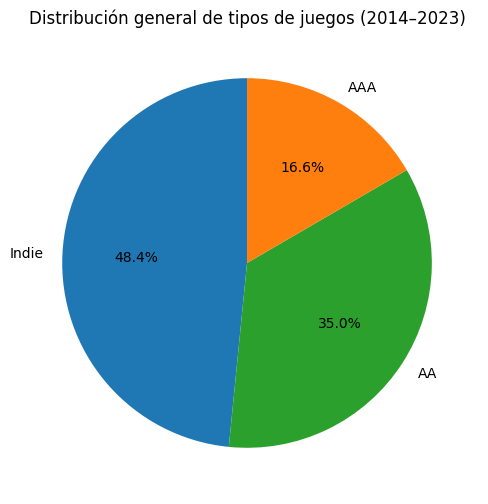

In [271]:
type_counts = genres_ratings["type"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(type_counts, labels=type_counts.index, autopct="%1.1f%%", startangle=90, colors=["#1f77b4", "#2ca02c", "#ff7f0e"])
plt.title("Distribución general de tipos de juegos (2014–2023)")
plt.show()


## Lanzamientos por tipo y año

Vemos cuantos juegos de cada tipo se lanzan cada año.

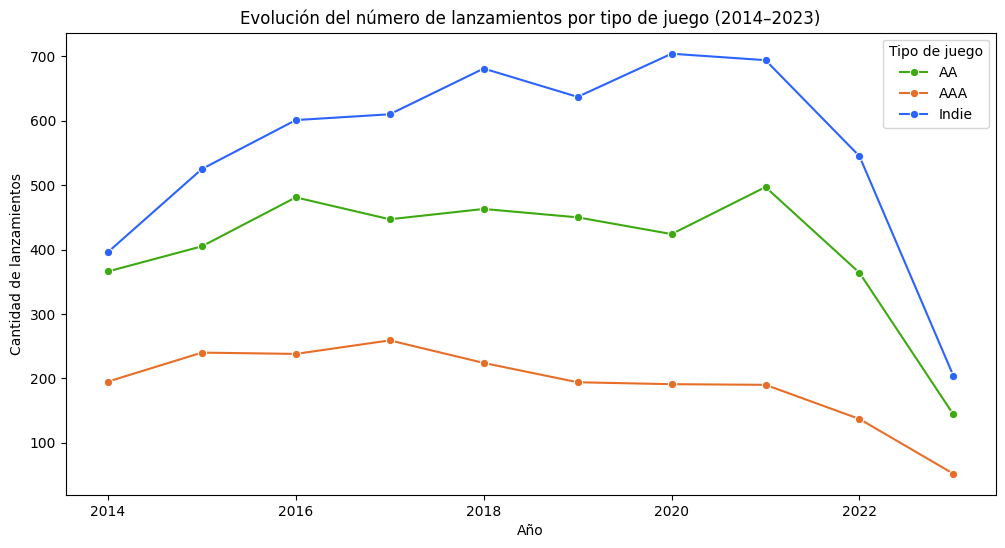

In [272]:
games_per_year = genres_ratings.groupby(["year", "type"]).size().reset_index(name="count")

plt.figure(figsize=(12,6))
sns.lineplot(data=games_per_year, x="year", y="count", hue="type", marker="o", palette=["#3caa10", "#e76e28", "#2b63fc"])
plt.title("Evolución del número de lanzamientos por tipo de juego (2014–2023)")
plt.xlabel("Año")
plt.ylabel("Cantidad de lanzamientos")
plt.legend(title="Tipo de juego")
plt.show()


## Nominaciones por tipo y año

Vemos que tipos de juegos (AAA, AA, Indie) fueron más nominados al Game of the Year a lo largo del tiempo.

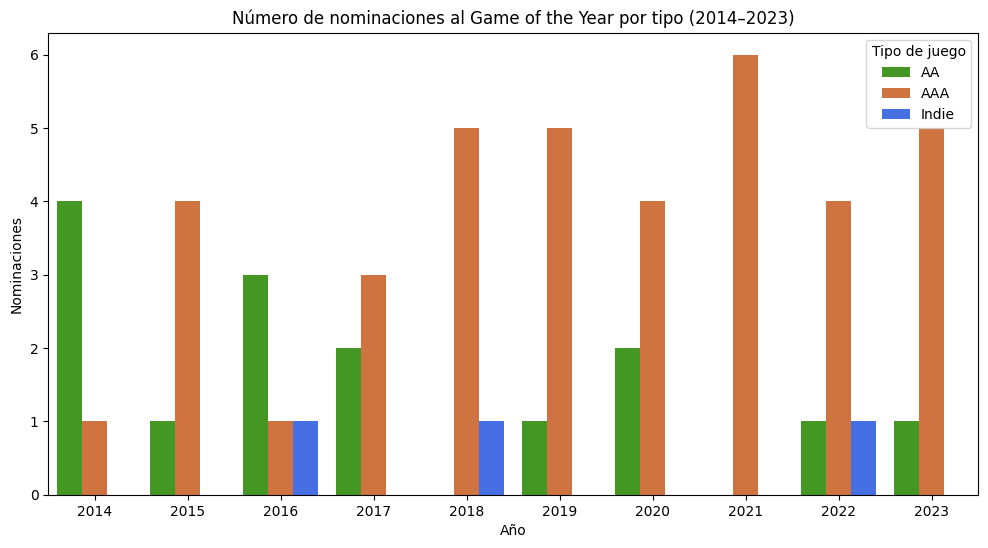

In [273]:
nominations = df_merged.groupby(["year", "type"]).size().reset_index(name="nominations")

plt.figure(figsize=(12,6))
sns.barplot(data=nominations, x="year", y="nominations", hue="type", palette=["#3caa10", "#e76e28", "#2b63fc"])
plt.title("Número de nominaciones al Game of the Year por tipo (2014–2023)")
plt.xlabel("Año")
plt.ylabel("Nominaciones")
plt.legend(title="Tipo de juego")
plt.show()


## Ganadores por tipo y año

Comprobamos tipo de juegos ganan más durante los años.

In [274]:
goty_winners = df_merged[df_merged["winner"] == 1][["year", "game", "type", "rating"]]
goty_winners = goty_winners.sort_values("year").reset_index(drop=True)
print(goty_winners)

   year                                     game type  rating
0  2014                  Dragon Age: Inquisition   AA     3.4
1  2015                 The Witcher 3: Wild Hunt  AAA     4.3
2  2016                                Overwatch   AA     3.2
3  2017  The Legend of Zelda: Breath of the Wild  AAA     4.4
4  2018                               God of War  AAA     4.2
5  2019                Sekiro: Shadows Die Twice  AAA     4.4
6  2020                   The Last of Us Part II  AAA     4.1
7  2021                             It Takes Two  AAA     4.2
8  2022                               Elden Ring  AAA     4.5
9  2023                          Baldur’s Gate 3   AA     NaN


Extraemos la suma de cada tipo

In [275]:
winners_by_type = goty_winners["type"].value_counts()
print(winners_by_type)

type
AAA    7
AA     3
Name: count, dtype: int64


Analizamos el rating promedio de todos los juegos

In [276]:
rating_promedio = genres_ratings.groupby("type")["rating"].mean().round(2)
print(rating_promedio)

type
AA       3.05
AAA      3.25
Indie    2.97
Name: rating, dtype: float64


Analizamos el rating promedio en los juegos mejor valorados de cada tipo

In [277]:
df_top = genres_ratings.sort_values(["type", "rating"], ascending=[True, False])
top10 = df_top.groupby("type").head(10)
top10_rating_promedio = top10.groupby("type")["rating"].mean().round(2)
print(top10_rating_promedio)

type
AA       4.88
AAA      4.70
Indie    4.92
Name: rating, dtype: float64
